In [2]:
import numpy as np
import numpy.linalg as nplin
import scipy.linalg as cplin
import scipy.optimize as opt
#Load data 
problem=1;
A=np.load("P"+str(problem)+"A.npy");
b=np.load("P"+str(problem)+"b.npy");
c=np.load("P"+str(problem)+"c.npy");
AT=np.transpose(A)
#Set parameters
mu=100; gamma=0.9; eps_mu=1e-4; 
#Set initial guess x_0/s_0
m1=10; m2=10; M=m1+m2; N=2
x_0=np.zeros([M*(M+1),1]);
x_0[:m1*M]=1/m1/M
x_0[m1*M:(m1+m2)*M]=1/m2/M
x_0[-M:]=1/M;
y_0=np.zeros([(N+1)*M+1-N,1]);
y_0[:M]=-1;y_0[-1]=-1;
s_0=c-np.matmul(AT,y_0)


In [3]:
def stepsize(x,s,dx,ds,eta=0.9995):
    alphax = -1/np.min(np.min(np.divide(dx,x)),-1); alphax = min(1, eta * alphax);
    alphas = -1/np.min(np.min(np.divide(ds,s)),-1); alphas = min(1, eta * alphas);
    return (alphax,alphas)

In [4]:
x=np.array(x_0);
s=np.array(s_0);
p=np.array(y_0);
max_ite=50;
count=0;
eps=1e-4
while (np.mean(np.multiply(x,s))>eps and count<max_ite):
    rp = np.matmul(A,x)-b;
    rd = np.matmul(AT,p)+s-c;
    rc = np.multiply(x,s);
    mu = np.mean(rc);
    
    ## Check relative decrease in residual, for purposes of convergence test
    ##residual  = norm([Rb;Rc;Rxs])/bc;
    
    ## ----- Predictor step -----
    
    # Get affine-scaling direction
    D2 = np.diag(np.divide(x,s)[:,0]);
    t1 = np.multiply(x,rd)-rc;  
    t2 = -(rp+np.matmul(A,np.divide(t1,s))); 
    AD2A=np.matmul(A,np.matmul(D2,AT))
    #%% Solve linear system AD^2A dp == t2;
    dp=nplin.solve(AD2A,t2)
  
    dx = np.divide((np.multiply(np.matmul(AT,dp),x)+t1),s);
    ds = -np.divide((np.multiply(s,dx)+rc),x);
    eta = max(0.95,1-mu); 
    
    #%(14.21ab)
    alphax = -1/np.min(np.min(np.divide(dx,x)),-1);
    alphas = -1/np.min(np.min(np.divide(ds,s)),-1);
    #%(14.22)

    
    mu_aff = np.mean(np.multiply(x+alphax*dx,s+alphas*ds));
    sigma = (mu_aff/mu)**3;
    
    rc = rc+np.multiply(dx,ds)-sigma*mu;
    t1 = np.multiply(x,rd)-rc; 
    t2 = -(rp+np.matmul(A,np.divide(t1,s)));
    
    #%% solve linear system AD^2A dp == t2;
    dp=nplin.solve(AD2A,t2)
    
    dx = np.divide((np.multiply(np.matmul(AT,dp),x)+t1),s);
    ds = -np.divide((np.multiply(s,dx)+rc),x);

    alphax, alphas = stepsize(x, s, dx, ds, eta);
    x = x + alphax * dx;
    s = s + alphas * ds;
    p = p + alphas * dp;
    
    print(np.mean(np.multiply(x,s)))
    print(np.sum(np.multiply(x,c)))
    count+=1



0.0023075858660583847
1.0409065013004517
0.0009084687663717495
0.8437258128258707
0.00047111094146209015
0.721947216490907
0.00031671331999923803
0.6767045590465769
7.662691725912615e-05
0.5825317840050166


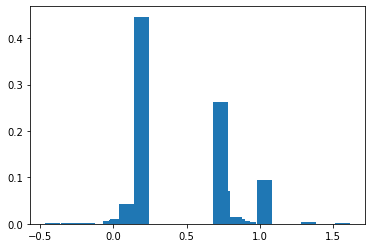

In [6]:
qs=np.load("P1q.npy",allow_pickle=True)
q1=qs[0]
q2=qs[1]
import matplotlib.pyplot as plt

plt.bar(np.concatenate([q1,q2]),x[-M:,0],width=0.1)
plt.savefig("P1_pc")

In [7]:
q1

array([-0.41258837,  0.02793465, -0.30337507,  0.01861933,  0.09304836,
       -0.17540167,  0.72967253,  0.19329906, -0.21152674, -0.01773728])

In [8]:
q2

array([0.82963183, 0.84673504, 0.92476774, 0.88551538, 0.85099446,
       0.90818556, 1.33082285, 1.02993049, 1.56206885, 0.74440564])